# HAGIWARA

### Baca File

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data5.xlsx"  # FORMAT FILE EXELNYA DIPERHATIKAN
df = pd.read_excel(file_path)

X = df["x"].values
SP1 = df["SP1"].values
SP2 = df["SP2"].values
SP3 = df["SP3"].values
SP4 = df["SP4"].values
SP5 = df["SP5"].values

def nan(x_array, y_array):
    y_filled = y_array.copy()
    for i in range(1, len(y_array) - 1):
        if np.isnan(y_array[i]) and not np.isnan(y_array[i - 1]) and not np.isnan(y_array[i + 1]):
            x0, x1, x2 = x_array[i - 1], x_array[i], x_array[i + 1]
            y0, y2 = y_array[i - 1], y_array[i + 1]
            y_filled[i] = y0 + ((x1 - x0) / (x2 - x0)) * (y2 - y0)
    return y_filled

SP1 = nan(X, SP1)
SP2 = nan(X, SP2)
SP3 = nan(X, SP3)
SP4 = nan(X, SP4)
SP5 = nan(X, SP5)


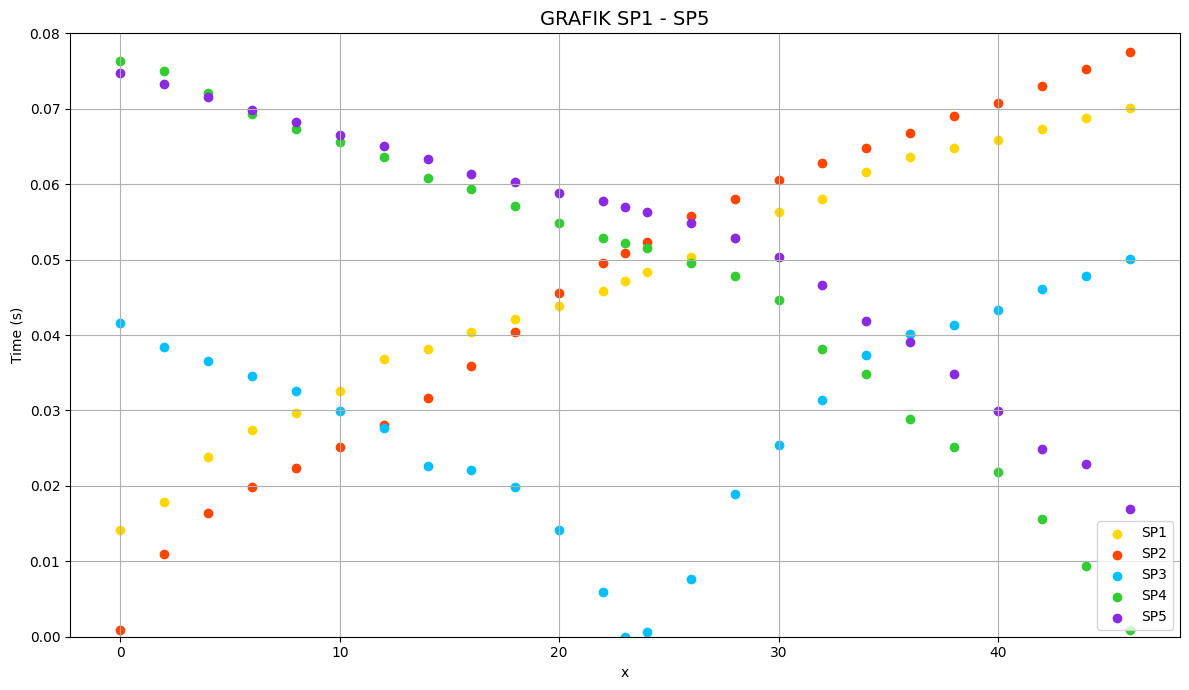

In [57]:
plt.figure(figsize=(12, 7))
plt.title("GRAFIK SP1 - SP5", fontsize=14)
plt.xlabel("x")
plt.ylabel("Time (s)")
plt.scatter(X, SP1, label="SP1", color="gold")
plt.scatter(X, SP2,  label="SP2", color="orangered")
plt.scatter(X, SP3, label="SP3", color="deepskyblue")
plt.scatter(X, SP4, label="SP4", color="limegreen")
plt.scatter(X, SP5, label="SP5", color="blueviolet")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(0, 0.08)
plt.show()

### Masukkan Data

In [58]:
posisi_SP2 = 0
posisi_SP3 = 23
posisi_SP4 = 46

Y = -40      # total kedalaman
Y_lim = -20  # total kedalaman pada grafik

# DF = Direct Forward, RF = Refracted Forward
# DR = Direct Reverse, RR = Refracted Reverse

"""lihat index pada exel, jika rentang Direct SP2 = index ke 1 sampai index ke 11, 
maka i_awal_DF_SP2 = 0 dan i_akhir_DF_SP2 = 11. intinya index akhir = index + 1"""

i_awal_DF_SP2 = 0
i_akhir_DF_SP2 = 11
i_awal_RF_SP2 = 11
i_akhir_RF_SP2 = len(X)

i_awal_RR_SP3 = 0
i_akhir_RR_SP3 = 10
i_awal_DR_SP3 = 10
i_akhir_DR_SP3 = 13

i_awal_DF_SP3 = 12
i_akhir_DF_SP3 = 19
i_awal_RF_SP3 = 19
i_akhir_RF_SP3 = len(X)

i_awal_RR_SP4 = 0
i_akhir_RR_SP4 = 16
i_awal_DR_SP4 = 16
i_akhir_DR_SP4 = len(X)


### Mencari Persamaan Garis

In [59]:
DF_SP2 = SP2[i_awal_DF_SP2 : i_akhir_DF_SP2]
RF_SP2 = SP2[i_awal_RF_SP2 : i_akhir_RF_SP2]

DR_SP3 = SP3[i_awal_DR_SP3 : i_akhir_DR_SP3]
RR_SP3 = SP3[i_awal_RR_SP3 : i_akhir_RR_SP3]

DR_SP4 = SP4[i_awal_DR_SP4 : i_akhir_DR_SP4]
RR_SP4 = SP4[i_awal_RR_SP4 : i_akhir_RR_SP4]

DF_SP3 = SP3[i_awal_DF_SP3 : i_akhir_DF_SP3]
RF_SP3 = SP3[i_awal_RF_SP3 : i_akhir_RF_SP3]


m_DF_SP2, c_DF_SP2 = np.polyfit(X[i_awal_DF_SP2 : i_akhir_DF_SP2], DF_SP2, 1)
m_RF_SP2, c_RF_SP2 = np.polyfit(X[i_awal_RF_SP2 : i_akhir_RF_SP2], RF_SP2, 1)

m_DR_SP3, c_DR_SP3 = np.polyfit(X[i_awal_DR_SP3 : i_akhir_DR_SP3], DR_SP3, 1)
m_RR_SP3, c_RR_SP3 = np.polyfit(X[i_awal_RR_SP3 : i_akhir_RR_SP3], RR_SP3, 1)

m_DR_SP4, c_DR_SP4 = np.polyfit(X[i_awal_DR_SP4 : i_akhir_DR_SP4], DR_SP4, 1)
m_RR_SP4, c_RR_SP4 = np.polyfit(X[i_awal_RR_SP4 : i_akhir_RR_SP4], RR_SP4, 1)

m_DF_SP3, c_DF_SP3 = np.polyfit(X[i_awal_DF_SP3 : i_akhir_DF_SP3], DF_SP3, 1)
m_RF_SP3, c_RF_SP3 = np.polyfit(X[i_awal_RF_SP3 : i_akhir_RF_SP3], RF_SP3, 1)


print(f"Direct Forward SP2    = {m_DF_SP2:.4f}x + {c_DF_SP2:.4f} ")
print(f"Refracted Forward SP2 = {m_RF_SP2:.4f}x + {c_RF_SP2:.4f} ")
print("")
print(f"Direct Reverse SP3    = {m_DR_SP3:.4f}x + {c_DR_SP3:.4f} ")
print(f"Refracted Reverse SP3 = {m_RR_SP3:.4f}x + {c_RR_SP3:.4f} ")
print("")
print(f"Direct Reverse SP4    = {m_DR_SP4:.4f}x + {c_DR_SP4:.4f} ")
print(f"Refracted Reverse SP4 = {m_RR_SP4:.4f}x + {c_RR_SP4:.4f} ")
print("")
print(f"Direct Forward SP3    = {m_DF_SP3:.4f}x + {c_DF_SP3:.4f} ")
print(f"Refracted Forward SP3 = {m_RF_SP3:.4f}x + {c_RF_SP3:.4f} ")

Direct Forward SP2    = 0.0020x + 0.0057 
Refracted Forward SP2 = 0.0011x + 0.0255 

Direct Reverse SP3    = -0.0046x + 0.1070 
Refracted Reverse SP3 = -0.0012x + 0.0416 

Direct Reverse SP4    = -0.0026x + 0.1217 
Refracted Reverse SP4 = -0.0010x + 0.0761 

Direct Forward SP3    = 0.0036x + -0.0847 
Refracted Forward SP3 = 0.0010x + 0.0027 


### Phantom Arrival

In [60]:
def phantom_near(awal, akhir, SP, near):
    new_SP = SP[awal : akhir]
    Y = near[awal : akhir] 
    DT = Y[-1] - new_SP[-1]
    phantom_arrival = Y[1:] - DT
    return phantom_arrival

def phantom_far(awal, akhir, SP, far):
    new_SP = SP[awal : akhir]
    Y = far[awal : akhir] 
    DT = Y[0] - new_SP[0]
    phantom_arrival = Y[:len(Y)-1] - DT
    return phantom_arrival

forward23 = np.append(phantom_near(i_awal_DF_SP2, i_akhir_DF_SP2, SP2, SP1), SP2[i_awal_RF_SP2 : i_akhir_DR_SP3 - 1])
reverse23 = np.append(SP3[i_awal_DF_SP2 + 1 : i_akhir_RR_SP3], phantom_far(i_awal_DR_SP3, i_akhir_DR_SP3, SP3, SP4))

forward24 = np.append(phantom_near(i_awal_DF_SP2, i_akhir_DF_SP2, SP2, SP1), SP2[i_awal_RF_SP2 : i_akhir_DR_SP4 - 1])
reverse24 = np.append(SP4[i_awal_DF_SP2 + 1 : i_akhir_RR_SP4], phantom_far(i_awal_DR_SP4, i_akhir_DR_SP4, SP4, SP5))

forward34 = np.append(phantom_near(i_awal_DF_SP3, i_akhir_DF_SP3, SP3, SP2), SP3[i_awal_RF_SP3 : i_akhir_DR_SP4 - 1])
reverse34 = np.append(SP4[i_awal_DF_SP3 + 1 : i_akhir_RR_SP4], phantom_far(i_awal_DR_SP4, i_akhir_DR_SP4, SP4, SP5))


print(f"tap SP2-SP3 = {forward23}")
print(f"tbp SP2-SP3 = {reverse23}")
print("")
print(f"tap SP2-SP4 = {forward24}")
print(f"tbp SP2-SP4 = {reverse24}")
print("")
print(f"tap SP3-SP4 = {forward34}")
print(f"tpb SP3-SP4 = {reverse34}")
print("")

tap SP2-SP3 = [0.019521 0.025462 0.029139 0.031402 0.034231 0.038475 0.039889 0.042153
 0.04385  0.045547 0.049507]
tbp SP2-SP3 = [0.038474 0.036494 0.034514 0.032533 0.029987 0.027724 0.022632 0.022066
 0.019803 0.014145 0.012165]

tap SP2-SP4 = [0.019521  0.025462  0.029139  0.031402  0.034231  0.038475  0.039889
 0.042153  0.04385   0.045547  0.049507  0.0509215 0.052336  0.055731
 0.057994  0.06054   0.062804  0.064784  0.066764  0.069027  0.070725
 0.072988  0.075251 ]
tbp SP2-SP4 = [0.074968 0.072139 0.06931  0.06733  0.065633 0.063652 0.060823 0.059409
 0.057146 0.054882 0.052902 0.052195 0.051488 0.049507 0.04781  0.044698
 0.04102  0.036211 0.033382 0.029139 0.024329 0.019237 0.017257]

tap SP3-SP4 = [0.024895 0.02829  0.030553 0.033099 0.035363 0.037343 0.040172 0.041303
 0.043284 0.046113 0.04781 ]
tpb SP3-SP4 = [0.051488 0.049507 0.04781  0.044698 0.04102  0.036211 0.033382 0.029139
 0.024329 0.019237 0.017257]



### tab & tp

In [61]:
def tab(m_forward, c_forward, m_reverse, c_reverse, x_forward, x_reverse):
    STS_forward = np.round(m_forward, 4) * x_reverse + np.round(c_forward, 4)
    STS_reverse = np.round((m_reverse), 4) * x_forward + np.round(c_reverse, 4)
    tab = (STS_forward + STS_reverse)/2
    return np.round(tab, 4)

def tp(m_forward, c_forward, m_reverse, c_reverse, x_forward, x_reverse, tap, tpb):
    STS_forward = np.round(m_forward, 4) * x_reverse + np.round(c_forward, 4)
    STS_reverse = np.round((m_reverse), 4) * x_forward + np.round(c_reverse, 4)
    tab = (STS_forward + STS_reverse)/2
    tp = (tap + tpb) - tab
    return tp

tab_SP23 = tab(m_RF_SP2, c_RF_SP2, m_RR_SP3, c_RR_SP3, posisi_SP2, posisi_SP3)
tab_SP24 = tab(m_RF_SP2, c_RF_SP2, m_RR_SP4, c_RR_SP4, posisi_SP2, posisi_SP4)
tab_SP34 = tab(m_RF_SP3, c_RF_SP3, m_RR_SP4, c_RR_SP4, posisi_SP3, posisi_SP4)


tp_SP23 = tp(m_RF_SP2, c_RF_SP2, m_RR_SP3, c_RR_SP3, posisi_SP2, posisi_SP3, forward23, reverse23)
tp_SP24 = tp(m_RF_SP2, c_RF_SP2, m_RR_SP4, c_RR_SP4, posisi_SP2, posisi_SP4, forward24, reverse24)
tp_SP34 = tp(m_RF_SP3, c_RF_SP3, m_RR_SP4, c_RR_SP4, posisi_SP3, posisi_SP4, forward34, reverse34)

print("-----------------------------------------------------------------------------------------------------")
print("")                                                                               
print(f"tab (SP2-SP3) = {tab_SP23}")
print(f"tab (SP2-SP4) = {tab_SP24}")
print(f"tab (SP3-SP4) = {tab_SP34}")
print("")
print("-----------------------------------------------------------------------------------------------------")
print("")
print(f"tp (SP2-SP3) = {tp_SP23}")
print("")
print(f"tp (SP2-SP4) = {tp_SP24}")
print("")
print(f"tp (SP3-SP4) = {tp_SP34}")
print("")
print("-----------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------

tab (SP2-SP3) = 0.0462
tab (SP2-SP4) = 0.0761
tab (SP3-SP4) = 0.0509

-----------------------------------------------------------------------------------------------------

tp (SP2-SP3) = [0.011795 0.015756 0.017453 0.017735 0.018018 0.019999 0.016321 0.018019
 0.017453 0.013492 0.015472]

tp (SP2-SP4) = [0.018389  0.021501  0.022349  0.022632  0.023764  0.026027  0.024612
 0.025462  0.024896  0.024329  0.026309  0.0270165 0.027724  0.029138
 0.029704  0.029138  0.027724  0.024895  0.024046  0.022066  0.018954
 0.016125  0.016408 ]

tp (SP3-SP4) = [0.025483 0.026897 0.027463 0.026897 0.025483 0.022654 0.022654 0.019542
 0.016713 0.01445  0.014167]

-----------------------------------------------------------------------------------------------------


### t'ap

In [62]:
def t_ap(m_forward, c_forward, m_reverse, c_reverse, x_forward, x_reverse, tap, tpb):
    STS_forward = np.round(m_forward, 4) * x_reverse + np.round(c_forward, 4)
    STS_reverse = np.round((-m_reverse), 4) * x_forward + np.round(c_reverse, 4)
    tab = (STS_forward + STS_reverse)/2
    tp = (tap + tpb) - tab
    t_ap = tap - tp/2
    return t_ap

t_ap_SP23 = t_ap(m_RF_SP2, c_RF_SP2, m_RR_SP3, c_RR_SP3, posisi_SP2, posisi_SP3, forward23, reverse23)
t_ap_SP24 = t_ap(m_RF_SP2, c_RF_SP2, m_RR_SP4, c_RR_SP4, posisi_SP2, posisi_SP4, forward24, reverse24)
t_ap_SP34 = t_ap(m_RF_SP3, c_RF_SP3, m_RR_SP4, c_RR_SP4, posisi_SP3, posisi_SP4, forward34, reverse34)

print(f"t'ap (SP2-SP3) = {t_ap_SP23}")
print("")
print(f"t'ap (SP2-SP4) = {t_ap_SP24}")
print("")
print(f"t'ap (SP3-SP4) = {t_ap_SP34}")


t'ap (SP2-SP3) = [0.0136235 0.017584  0.0204125 0.0225345 0.025222  0.0284755 0.0317285
 0.0331435 0.0351235 0.038801  0.041771 ]

t'ap (SP2-SP4) = [0.0103265  0.0147115  0.0179645  0.020086   0.022349   0.0254615
 0.027583   0.029422   0.031402   0.0333825  0.0363525  0.03741325
 0.038474   0.041162   0.043142   0.045971   0.048942   0.0523365
 0.054741   0.057994   0.061248   0.0649255  0.067047  ]

t'ap (SP3-SP4) = [0.0236535 0.0263415 0.0283215 0.0311505 0.0341215 0.037516  0.040345
 0.043032  0.0464275 0.050388  0.0522265]


### plot & persamaan garis t'ap

In [63]:
m_t_ap_SP23, c_t_ap_SP23 = np.polyfit(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP3 - 1], t_ap_SP23, 1)
m_t_ap_SP24, c_t_ap_SP24 = np.polyfit(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP4 - 1], t_ap_SP24, 1)
m_t_ap_SP34, c_t_ap_SP34 = np.polyfit(X[i_awal_DF_SP3 + 1 : i_akhir_DR_SP4 - 1], t_ap_SP34, 1)

print(f"persamaan t'ap (SP2-SP3) = {m_t_ap_SP23:.4f}x + {c_t_ap_SP23:.4f} ")
print(f"persamaan t'ap (SP2-SP4) = {m_t_ap_SP24:.4f}x + {c_t_ap_SP24:.4f} ")
print(f"persamaan t'ap (SP3-SP4) = {m_t_ap_SP34:.4f}x + {c_t_ap_SP34:.4f} ")

y_t_ap_SP23 = m_t_ap_SP23 * X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP3 - 1] + c_t_ap_SP23
y_t_ap_SP24 = m_t_ap_SP24 * X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP4 - 1] + c_t_ap_SP24
y_t_ap_SP34 = m_t_ap_SP34 * X[i_awal_DF_SP3 + 1 : i_akhir_DR_SP4 - 1] + c_t_ap_SP34


persamaan t'ap (SP2-SP3) = 0.0014x + 0.0118 
persamaan t'ap (SP2-SP4) = 0.0013x + 0.0088 
persamaan t'ap (SP3-SP4) = 0.0015x + -0.0124 


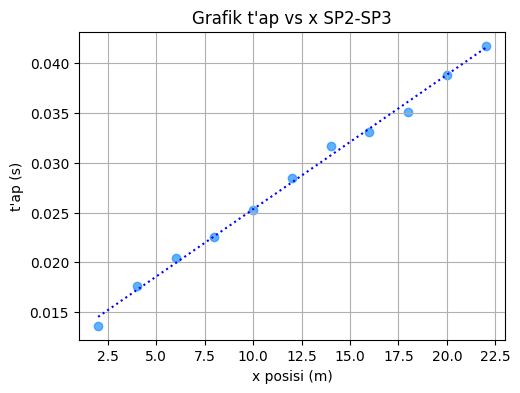

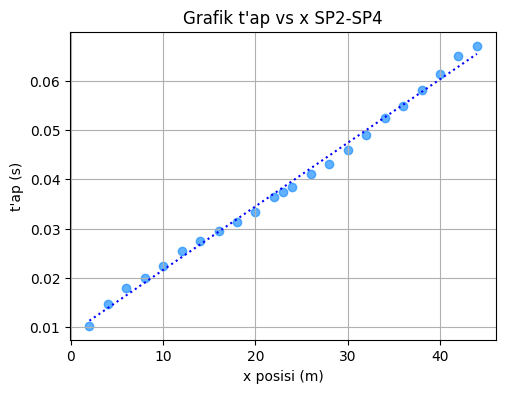

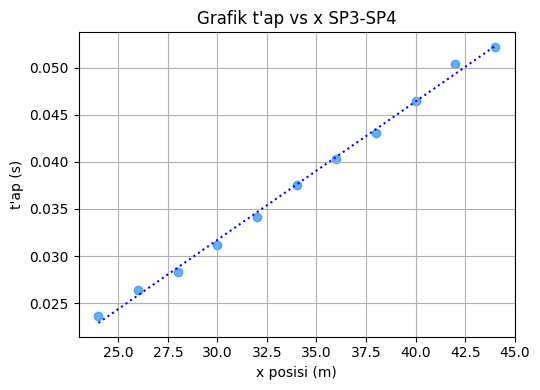

In [64]:
# Plot
plt.figure(figsize=(5.5, 4)) 
plt.scatter(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP3 - 1], t_ap_SP23, color='dodgerblue', alpha=0.7)
plt.plot(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP3 - 1], y_t_ap_SP23, 'b:', linewidth=1.5)
plt.title("Grafik t'ap vs x SP2-SP3", fontsize=12)
plt.xlabel("x posisi (m)")
plt.ylabel("t'ap (s)")
plt.grid(True)

plt.figure(figsize=(5.5, 4)) 
plt.scatter(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP4 - 1], t_ap_SP24, color='dodgerblue', alpha=0.7)
plt.plot(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP4 - 1], y_t_ap_SP24, 'b:', linewidth=1.5)
plt.title("Grafik t'ap vs x SP2-SP4", fontsize=12)
plt.xlabel("x posisi (m)")
plt.ylabel("t'ap (s)")
plt.grid(True)

plt.figure(figsize=(5.5, 4)) 
plt.scatter(X[i_awal_DF_SP3 + 1 : i_akhir_DR_SP4 - 1], t_ap_SP34, color='dodgerblue', alpha=0.7)
plt.plot(X[i_awal_DF_SP3 + 1 : i_akhir_DR_SP4 - 1], y_t_ap_SP34, 'b:', linewidth=1.5)
plt.title("Grafik t'ap vs x SP3-SP4", fontsize=12)
plt.xlabel("x posisi (m)")
plt.ylabel("t'ap (s)")
plt.grid(True)

plt.tight_layout()
plt.show()

### V1, V2, cos θ

In [65]:
V1_SP23 = (1/np.round(m_DF_SP2,4) - 1/np.round(m_DR_SP3,4))/2
V1_SP24 = (1/np.round(m_DF_SP2,4) - 1/np.round(m_DR_SP4,4))/2
V1_SP34 = (1/np.round(m_DF_SP3,4) - 1/np.round(m_DR_SP4,4))/2

V2_SP23 = 1/np.round(m_t_ap_SP23,4)
V2_SP24 = 1/np.round(m_t_ap_SP24,4)
V2_SP34 = 1/np.round(m_t_ap_SP34,4)

teta_SP23 = (1 - (V1_SP23/V2_SP23)**2)**0.5
teta_SP24 = (1 - (V1_SP24/V2_SP24)**2)**0.5
teta_SP34 = (1 - (V1_SP34/V2_SP34)**2)**0.5

print(f"V1(SP2-SP3) = {V1_SP23:.4f}       V2(SP2-SP3) = {V2_SP23:.4f}        teta(SP2-SP3) = {teta_SP23:.4f}")
print(f"V1(SP2-SP4) = {V1_SP24:.4f}       V2(SP2-SP4) = {V2_SP24:.4f}        teta(SP2-SP4) = {teta_SP24:.4f}")
print(f"V1(SP3-SP4) = {V1_SP34:.4f}       V2(SP3-SP4) = {V2_SP34:.4f}        teta(SP3-SP4) = {teta_SP34:.4f}")
print("")


V1(SP2-SP3) = 358.6957       V2(SP2-SP3) = 714.2857        teta(SP2-SP3) = 0.8648
V1(SP2-SP4) = 442.3077       V2(SP2-SP4) = 769.2308        teta(SP2-SP4) = 0.8182
V1(SP3-SP4) = 331.1966       V2(SP3-SP4) = 666.6667        teta(SP3-SP4) = 0.8679



### hp & h2

In [66]:
hp_SP23 = -(V1_SP23/(2*teta_SP23))*tp_SP23
hp_SP24 = -(V1_SP24/(2*teta_SP24))*tp_SP24
hp_SP34 = -(V1_SP34/(2*teta_SP34))*tp_SP34

h2_SP23 = Y - hp_SP23
h2_SP24 = Y - hp_SP24
h2_SP34 = Y - hp_SP34

print(f"hp(SP2-SP3) = {hp_SP23}")
print("")
print(f"h2(SP2-SP3) = {h2_SP23}")
print("\n" + "-" * 100 + "\n")
print(f"hp(SP2-SP4) = {hp_SP24}")
print("")
print(f"h2(SP2-SP4) = {h2_SP24}")
print("\n" + "-" * 100 + "\n")
print(f"hp(SP3-SP4) = {hp_SP34}")
print("")
print(f"h2(SP3-SP4) = {h2_SP34}")

hp(SP2-SP3) = [-2.44621784 -3.26770736 -3.61965578 -3.67814102 -3.73683366 -4.14768212
 -3.38488524 -3.73704105 -3.61965578 -2.79816626 -3.20880733]

h2(SP2-SP3) = [-37.55378216 -36.73229264 -36.38034422 -36.32185898 -36.26316634
 -35.85231788 -36.61511476 -36.26295895 -36.38034422 -37.20183374
 -36.79119267]

----------------------------------------------------------------------------------------------------

hp(SP2-SP4) = [-4.97070358 -5.81190373 -6.04112536 -6.11762268 -6.42361193 -7.03532014
 -6.65283357 -6.88259582 -6.72960119 -6.57633625 -7.11154715 -7.30279043
 -7.49403372 -7.87624998 -8.02924461 -7.87624998 -7.49403372 -6.72933088
 -6.49983894 -5.96462805 -5.1234279  -4.35872507 -4.43522238]

h2(SP2-SP4) = [-35.02929642 -34.18809627 -33.95887464 -33.88237732 -33.57638807
 -32.96467986 -33.34716643 -33.11740418 -33.27039881 -33.42366375
 -32.88845285 -32.69720957 -32.50596628 -32.12375002 -31.97075539
 -32.12375002 -32.50596628 -33.27066912 -33.50016106 -34.03537195
 -34.8765721

### Plot Lapisan

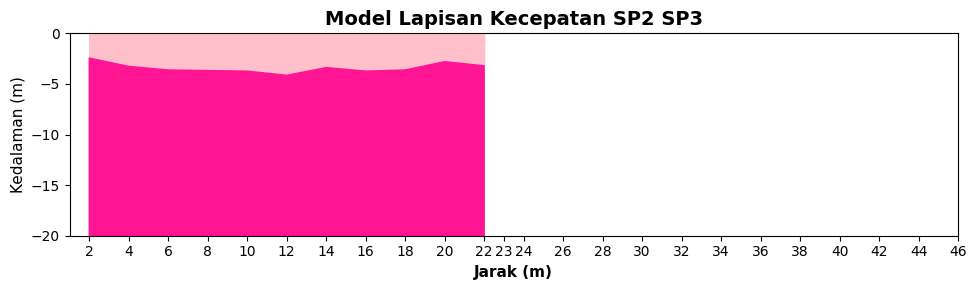

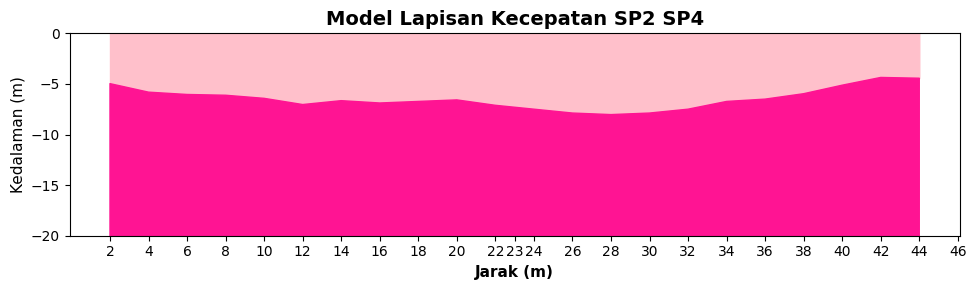

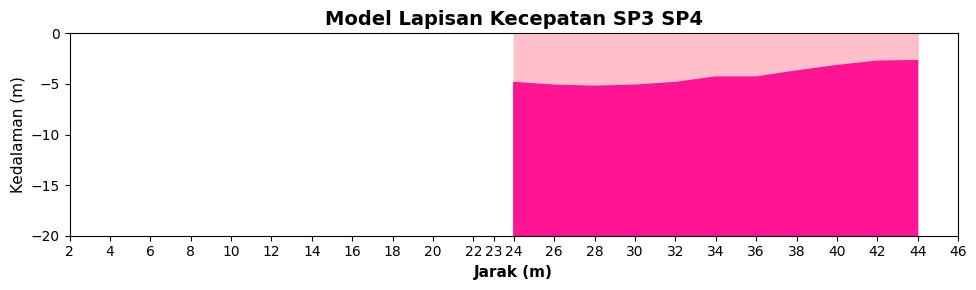

In [67]:
plt.figure(figsize=(10, 3))
plt.fill_between(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP3 - 1], hp_SP23, color='pink')
plt.fill_between(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP3 - 1], hp_SP23, h2_SP23, color='deeppink')
plt.title("Model Lapisan Kecepatan SP2 SP3", fontsize=14, weight='bold')
plt.xlabel("Jarak (m)", fontsize=11, weight='bold')
plt.ylabel("Kedalaman (m)", fontsize=11)
plt.ylim(Y_lim, 0)
plt.xticks(X[1:len(X)])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.fill_between(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP4 - 1], hp_SP24, color='pink')
plt.fill_between(X[i_awal_DF_SP2 + 1 : i_akhir_DR_SP4 - 1], hp_SP24, h2_SP24, color='deeppink')
plt.title("Model Lapisan Kecepatan SP2 SP4", fontsize=14, weight='bold')
plt.xlabel("Jarak (m)", fontsize=11, weight='bold')
plt.ylabel("Kedalaman (m)", fontsize=11)
plt.ylim(Y_lim, 0)
plt.xticks(X[1:len(X)])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.fill_between(X[i_awal_DF_SP3 + 1 : i_akhir_DR_SP4 - 1], hp_SP34, color='pink')
plt.fill_between(X[i_awal_DF_SP3 + 1 : i_akhir_DR_SP4 - 1], hp_SP34, h2_SP34, color='deeppink')
plt.title("Model Lapisan Kecepatan SP3 SP4", fontsize=14, weight='bold')
plt.xlabel("Jarak (m)", fontsize=11, weight='bold')
plt.ylabel("Kedalaman (m)", fontsize=11)
plt.ylim(Y_lim, 0)
plt.xticks(X[1:len(X)])
plt.tight_layout()
plt.show()

### Korelasi Antar Lapisan

In [71]:
def selisih_antar_lapisan(h_1, h_2):
    selisih = h_1 - h_2
    return np.mean(selisih)

SP23_VS_SP24 = selisih_antar_lapisan(hp_SP23, hp_SP24[0: len(hp_SP23)])
SP24_VS_SP34 = selisih_antar_lapisan(hp_SP24[12:], hp_SP34)

print(f"nilai selisih (SP2-SP3 VS SP2-SP4) = {SP23_VS_SP24}")
print(f"nilai selsiih (SP2-SP4 VS SP3-SP4) = {SP24_VS_SP34}")


nilai selisih (SP2-SP3 VS SP2-SP4) = 2.973491633787383
nilai selsiih (SP2-SP4 VS SP3-SP4) = -2.3298143143430092
